<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **8:00PM, Sunday, May 23th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment-2.ipynb` 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Enter Your Student ID Below:

## Introduction

You have three (3) datasets to work with in this assignment, broken down as follows:

- Questions 1 and 2 - Transcoding Dataset
- Question 3 - SDSS
- Question 4 - SuperStore Database

Once again, the  dataset is a sizable dataset (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.

Further reading on the datasets can be found in the following locations:
- [Transcoding Dataset.md](./data/cve/about.md)
- [Northwind Database.md](./data/bikestores/about.md)
- [SDSS Description](./data/SDSS_Description.txt)

****

In [1]:
# Code Imports
# Every Lab import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn.linear_model import LinearRegression

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.
import seaborn as sns # package used to draw heatmap

****
## Q1: Clustering Videos for Transcoding <span style= 'float: right;'><b>[25 marks]</b></span>
Building off the dataset you initially encountered in Assignment 1, the Transcoding dataset has made a return for the following question.

The following question is designed to get you to load and process data and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs, and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing <span style= 'float: right;'><b>[5 marks]</b></span>

To start, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/transcoding_data.csv`.
2. Check the dataset for any missing values and account for them.
3. Prepare the data for a clustering task. You are welcome to use the data processing code that you wrote for the previous assignment.
    - Drop irrelevant and redundant columns. Also drop the columns `frames`, `category`, `size`, `o_bitrate`, `codec`, and `o_codec`.
    - Encode `o_resolution` as ordinal categorical variable with the order (176 x 144) $\prec$ (320 x 240) $\prec$ (480 x 360) $\prec$ (640 x 480) $\prec$ (1280 x 720) $\prec$ (1920 x 1080).
4. Provide descriptive statistics and display the first ten rows of the resulting dataset.

Descriptive statistics generally consists of count, mean, standard deviation, min, max, and interquartile measures.
The relation $a \prec b$ states that the variable $a$ precedes $b$.

In [4]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
data = pd.read_csv("./data/transcoding_data.csv", index_col=0)

data.dropna(axis=0,how='any')

data.drop(['frames','url','category','size','o_bitrate','codec','o_codec'],axis=1,inplace=True)

def separate_by_IO(row):
    if row['o_resolution']=='176x144':
        return 1
    elif row['o_resolution']=='320x240':
        return 2
    elif row['o_resolution']=='480x360':
        return 3
    elif row['o_resolution']=='640x480':
        return 4
    elif row['o_resolution']=='1280x720':
        return 5
    else:
        return 6
data['o_resolution']=data.apply(separate_by_IO,axis=1)

print(data.describe())
data.head(10)

           duration       bitrate        width       height    framerate  \
count   4890.000000   4890.000000  4890.000000  4890.000000  4890.000000   
mean    1277.353988    788.025767   570.453988   366.371370    22.944718   
std     1553.844302   1165.641217   451.848716   249.734926     7.945936   
min        1.000000      9.000000   128.000000    96.000000     0.000000   
25%      405.000000     91.000000   176.000000   144.000000    12.000000   
50%      812.000000    347.000000   426.000000   240.000000    25.000000   
75%     1545.000000    836.750000   640.000000   480.000000    29.970000   
max    25845.000000  14502.000000  1920.000000  1920.000000    49.420000   

                 i              p            b  o_framerate      o_width  \
count  4890.000000    4890.000000  4890.000000  4890.000000  4890.000000   
mean    398.587935   28509.502045   116.459100    21.112239   795.762781   
std     496.685941   36594.131433   157.709226     6.736176   607.671184   
min       0

,duration,bitrate,width,height,resolution,framerate,i,p,b,o_framerate,o_width,o_height,o_resolution,umem,utime
id,,,,,,,,,,,,,,,
uDNj-_5ty48,267,373,568,320,568x320,29.97,102,7858,40,15.00,480,360,3,172247.935215,166.415727
uDNj-_5ty48,267,324,400,226,400x226,29.97,130,7816,54,12.00,320,240,2,115355.838797,51.035704
uDNj-_5ty48,267,85,176,144,176x144,12.00,43,3146,14,24.00,640,480,4,37827.340566,173.629478
WCgt-AactyY,31,1261,640,480,640x480,24.00,58,714,28,24.00,640,480,4,110002.908561,150.693204
WCgt-AactyY,31,370,320,240,320x240,24.00,61,674,8,29.97,1920,1080,6,77903.861755,278.413210
h9Kt-GhvVlg,333,727,384,288,384x288,25.00,139,8157,27,15.00,480,360,3,90781.115843,130.548432
h9Kt-GhvVlg,333,306,320,240,320x240,25.00,163,8119,42,24.00,1280,720,5,54266.504159,184.049056
h9Kt-GhvVlg,333,91,176,144,176x144,12.00,57,3920,18,15.00,480,360,3,18842.877160,59.506751
Wscj-i5jTjc,67,633,854,480,854x480,29.92,26,1974,4,29.97,1920,1080,6,236610.816723,235.736431


### 1.2 K-Means Clustering Implementation <span style= 'float: right;'><b>[10 marks]</b></span>

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **Transcoding Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset of transcoded videos by using either all or a subset of the available features. Suppose you have used more than two features for your clustering; you are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>

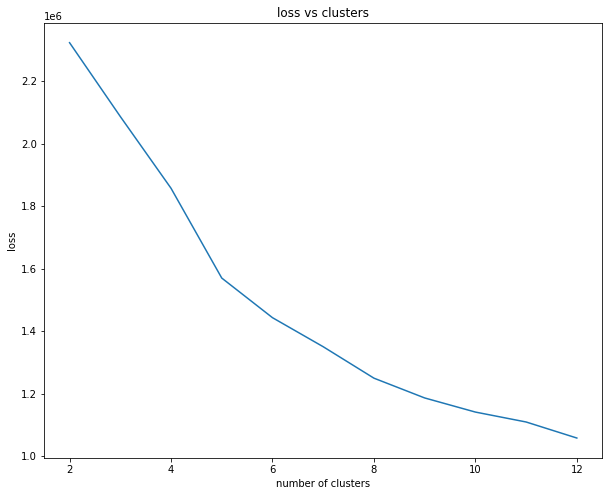

In [5]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
loss = []

for i in range(2,13):
    dataSet = data[['bitrate','width','height','i','p','b','o_width','o_height']].copy()
    pca = PCA(n_components=2)
    dataSet = pca.fit_transform(dataSet)
    
    kmeans = KMeans(n_clusters=i, random_state=0 ,max_iter =50).fit(dataSet)
    center = kmeans.cluster_centers_
    labels = kmeans.labels_

    now = 0
    for j in range(i):
        now += np.linalg.norm(dataSet[labels==j]-center[j])
    loss.append(now)
plt.figure(figsize=(10,8))
plt.title('loss vs clusters')
plt.xlabel('number of clusters')
plt.ylabel('loss')
plt.plot([i for i in range(2,13)],loss)

[1249235.7533037704,
 1249149.5733022941,
 1249149.5733022932,
 1249149.5733022941]

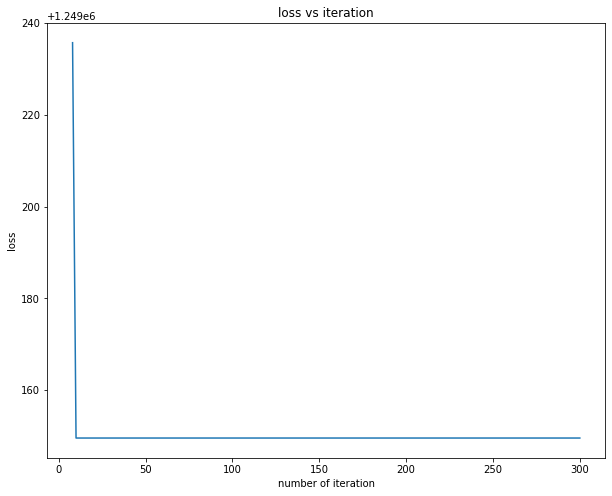

In [10]:
loss = []
ite = [8,10,100,300]
for i in ite:
    dataSet = data[['bitrate','width','height','i','p','b','o_width','o_height']].copy()
    pca = PCA(n_components=2)
    dataSet = pca.fit_transform(dataSet)
    
    kmeans = KMeans(n_clusters=8, random_state=0 ,max_iter =i).fit(dataSet)
    center = kmeans.cluster_centers_
    labels = kmeans.labels_

    now = 0
    for j in range(8):
        now += np.linalg.norm(dataSet[labels==j]-center[j])
    loss.append(now)
plt.figure(figsize=(10,8))
plt.title('loss vs iteration')
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.plot(ite,loss)

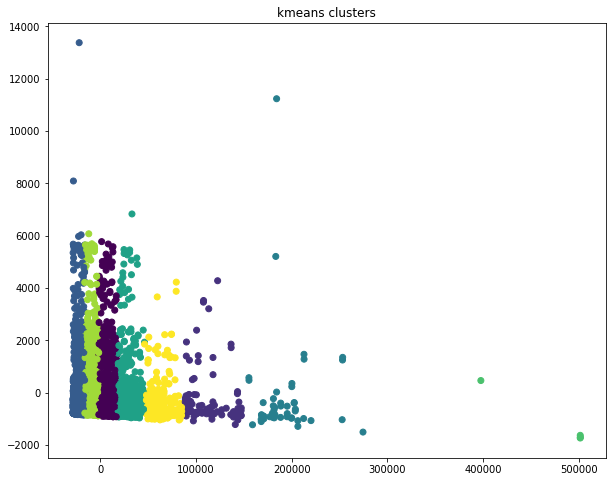

In [11]:
dataSet = data[['bitrate','width','height','i','p','b','o_width','o_height']].copy()
pca = PCA(n_components=2)
dataSet = pca.fit_transform(dataSet)

kmeans = KMeans(n_clusters=8, random_state=0, max_iter =100).fit(dataSet)
center = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(10,8))
axes = plt.subplot()
plt.scatter(dataSet[:,0], dataSet[:,1], c=labels)
plt.title('kmeans clusters')
plt.show()

# YOUR RESPONSE HERE
### From img 'loss vs clusters', we use elbow method to decided the k. As we can see, the loss changed when clusters equal to 8. At the same time, When clusters equal to 8 the loss of the model is relatively low.

### From image 'loss vs number of iteration', we found when iteration is greater than 10 the loss is the minimum, In this case, we choose 100 iteration to avoid underfitting.

### 1.3 Analysing the Clusters <span style= 'float: right;'><b>[10 marks]</b></span>

With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Create a DataFrame for each cluster's data and identify their main attributes - how do these clusters differ from each other. Provide a brief commentary of the clustering model based on the analysis along with a visualisation of the mean `umem` and `utime` across the different clusters.

**Note:** Your analysis should include the mean and deviation of the continuous variables, mode of the categorical variables, and size of each cluster.

cluster:  0  length: 1856
               umem        utime
count  1.856000e+03  1856.000000
mean   1.008943e+05   135.537400
std    1.286591e+05    62.020074
min    3.970361e+03     0.752315
25%    3.148553e+04    88.293520
50%    5.549695e+04   128.054390
75%    1.077759e+05   174.427775
max    1.007746e+06   389.170879
cluster:  1  length: 243
               umem       utime
count  2.430000e+02  243.000000
mean   3.029985e+05  210.828519
std    1.570586e+05   59.362544
min    1.318008e+05   92.728589
25%    1.944472e+05  163.687710
50%    2.574283e+05  210.093272
75%    3.597683e+05  246.012681
max    1.024826e+06  396.516114
cluster:  2  length: 1374
               umem        utime
count  1.374000e+03  1374.000000
mean   1.794259e+05   155.210223
std    1.661117e+05    66.708816
min    2.421059e+04     3.888462
25%    8.150270e+04   102.241322
50%    1.164313e+05   148.715148
75%    2.099078e+05   199.926169
max    1.212840e+06   398.015851
cluster:  3  length: 50
               um

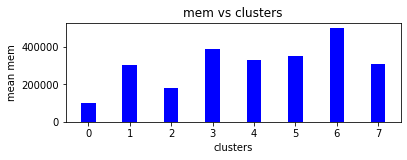

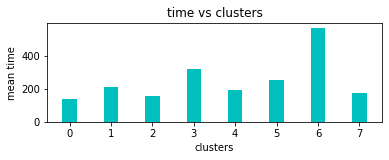

In [23]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

mem,time=[],[]
for i in range(8):
    df1 = data[['umem','utime']].copy()
    df1 = df1[labels==i]
    mem.append(df1['umem'].mean())
    time.append(df1['utime'].mean())
    print("cluster: ",i,' length:',len(df1))
    print(df1.describe())

bar_width,x = 0.35,np.arange(8)
plt.subplot(2,1,1)
plt.bar(x, mem, bar_width, color="b", align="center")
plt.title('mem vs clusters')
plt.xlabel('clusters')
plt.ylabel('mean mem')
plt.show()
plt.subplot(2,1,2)
plt.bar(x, time, bar_width, align="center", color="c")
plt.title('time vs clusters')
plt.xlabel('clusters')
plt.ylabel('mean time')
plt.show()

# YOUR RESPONSE HERE
### From the graphs above, we can see, clusters need more memory cost more time at the same time. Each cluster have the mean time and mean memory with (3.409088e+05  198.906942),(1.367941e+05   144.903013),(341564.776243  276.560626),(504489.680686  570.278633),(3.130691e+05  176.742978),(3.368574e+05  224.735884),(9.167270e+04   132.927552) and (3.698738e+05  310.463101) respectivately. The size of each cluster is 258,1129,43,4,594,92,1304 and 43.

*****
## Q2: KNN Classification for Video Transcoding <span style= 'float: right;'><b>[20 marks]</b></span>

The rental company has decided that they want to use simple machine learning to allocate cost tags based on the transcoding score to the transcoded videos. The transcoding score can be obtained by taking the average of `umem` and `utime` and then normalizing it. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Transcoding Score is between 0.0 and 0.3   |
|  Moderate                |  Transcoding Score is between 0.3 and 0.7 |
|  Expensive               |  Transcoding Score is between 0.7 and 1.0 |


**Note:** The `Classification` variable is an ordinal categorical variable whose ordering is Cheap $\prec$ Moderate $\prec$ Expensive where the relation $a \prec b$ states that the variable $a$ precedes $b$.




**Your task is to implement a `K-Nearest Neighbours Classification Algorithm` that can predict the transcoding score of a video**. 

You are required to perform the following tasks:

1. Use the same transcoding_data dataset as the previous question.
2. Modify the dataset to create the `Transcoding Score` column by manually determining the prediction class for existing data (where the rating is within the classification system defined above)
3. Implement an algorithm that can predict the `Transcoding Score` using the features present in the transcoding_data dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `umem` and `utime` of the transcoded video. Various attributes relating to the characteristics of the video and their respective transcoding settings in the tables can be helpful while making the algorithm. If required, you can also look to make new compound attributes that may be helpful in increasing the accuracy of your model.

You are expected to **verbally and visually (wherever approriate)** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

Accuracy: 0.9352419904567144


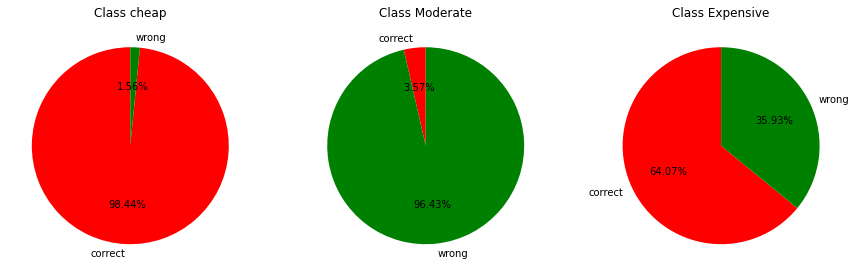

[[1261    0   20]
 [   1    4   14]
 [  59    1  107]]


In [24]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
q2 = data.copy()
q2.eval('TranscodingScore = (umem+utime)/2' , inplace=True)
q2['TranscodingScore'] = (q2['TranscodingScore']-q2['TranscodingScore'].min())/(q2['TranscodingScore'].max()-q2['TranscodingScore'].min())
def separate_by_score(row):
    if row['TranscodingScore']<=0.3:
        return 'Cheap'
    elif row['TranscodingScore']<=0.7:
        return 'Moderate'
    else:
        return 'Expensive'
q2['Classification']=q2.apply(separate_by_score,axis=1)
train_X,test_X,train_y,test_y = train_test_split(q2[['duration','bitrate','width','i','p','b','o_framerate','o_width']],q2['Classification'],test_size=0.3,random_state=5)
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh.fit(train_X,train_y)
qq=neigh.predict(test_X)
print('Accuracy: '+str(neigh.score(test_X,test_y)))
matrix = confusion_matrix(test_y,qq)

plt.figure(figsize=(15,5.5))
plt.subplot(1,3,1)
plt.title('Class cheap')
labels = ['correct','wrong']
sizes = [matrix[0][0],matrix[0][1]+matrix[0][2]]
colors = ['red','green']
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)

plt.subplot(1,3,2)
plt.title('Class Moderate')
sizes = [matrix[1][1],matrix[1][0]+matrix[2][2]]
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)

plt.subplot(1,3,3)
plt.title('Class Expensive')
sizes = [matrix[2][2],matrix[2][0]+matrix[2][1]]
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)
plt.show()
print(matrix)

Enter your Response and Predictors here (for marker simplicity)

Response: 'duration','bitrate','width','i','p','b','o_framerate','o_width'

Predictors: Classification

# YOUR RESPONSE HERE
As the pie charts illustrate, class 'cheap' and 'expensive' performs better than 'Moderate', and 'cheap' perform the best. From the confusing matrix, we can know, most data are distributed in 'cheap', which means normalization is not a suitable method for this task, Standardization may an ideal method which distributes the data in a standard distribution. On the other hand, the accuracy is over 93% which indicates the KNN classification can classify the data properly. For response, we choose duration, bitrate, width, i, p, b, o_framerate and o_width.

*****
## Q3: Decision Trees for Digital Sky <span style= 'float: right;'><b>[20 marks]</b></span>

The SDSS.csv data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey, which offers public data of space observations. Every observation is described by 17 feature columns and 1 class column, which identifies it as either a star, galaxy or quasar.

To ease your start with the data, you can read the feature descriptions in the [SDSS Description](./data/SDSS_Description.txt) file.

**Your task is to implement a `Decision Tree Classification Algorithm` that can predict the `class` of an image**.

You are required to perform the following tasks:

1. Import the SDSS dataset and perform preprocessing as required.
2. Create a new feature (or column) called `category` by converting the nominal categorical variable `class` into an ordinal categorical variable based on the table presented below:

|  **class**      |  **category**        |
|--------------------------|------------------------- |
|  STAR                   |  0   |
|  GALAXY                |  1 |
|  QSO               |  2 |


3. Implement an algorithm that can predict the `category` using the features present in the SDSS dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.
5.  Plot the resulting Decision Tree produced by the Tree-Building algorithm.

The QSO class refers to the quasi-stellar object, quasar. The order assigned to the `class` categorical variable is based on the brightness of the object, i.e. QSO is brighter than a GALAXY, and a GALAXY is brighter than a STAR.

You are welcome to use any features within the dataset, except the `class` of the SDSS data. If required, you can also look to make new compound attributes that may help increase the accuracy of your model. You are expected to **verbally and visually** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [13]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
data = pd.read_csv("./data/SDSS.csv", index_col=0)
data.dropna(axis=0,how='any')
def separate_by_class(row):
    if row['class']=='STAR':
        return 0
    elif row['class']=='GALAXY':
        return 1
    else:
        return 2
data['category']=data.apply(separate_by_class,axis=1)
data.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,category
objid,,,,,,,,,,,,,,,,,,
1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,0
1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,0
1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,1
1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,0
1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,0


In [15]:
data.corr()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,category
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485,0.041189
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012,0.091249
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301,0.284541
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187,0.357352
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081,0.278678
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977,0.205367
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980,0.149444
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566,0.100627
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,NaN,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629,0.010269


### From the table above, We found that 'u','g','r','z','run','redshift','mjd' has a high connection with the category. In this case, we choose them as Response.

confusion_matrix:
[[1274    7    0]
 [   5 1431   18]
 [   0   20  245]]
Test secore 0.9833333333333333


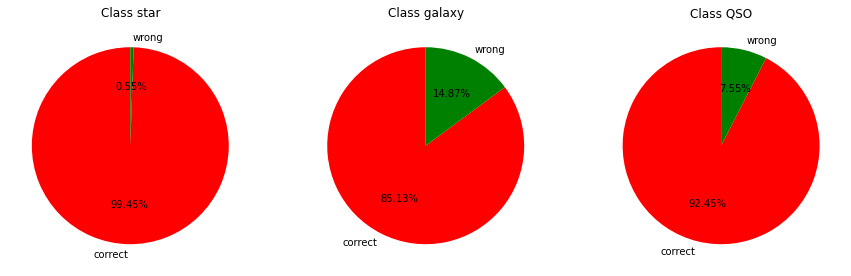

In [26]:
train_X,test_X,train_y,test_y = train_test_split(data[['u','g','r','z','run','redshift','mjd']],data['category'],test_size=0.3,random_state=5)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_y)
pre_y=clf.predict(test_X)

print('confusion_matrix:')
matrix = confusion_matrix(pre_y,test_y)
print(matrix)
print("Test secore",clf.score(test_X,test_y))
tree.export_graphviz(clf,out_file="./tree.dot",rounded=True,filled=True)

plt.figure(figsize=(15,5.5))
plt.subplot(1,3,1)
plt.title('Class star')
labels = ['correct','wrong']
sizes = [matrix[0][0],matrix[0][1]+matrix[0][2]]
colors = ['red','green']
explode = (0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)

plt.subplot(1,3,2)
plt.title('Class galaxy')
sizes = [matrix[1][1],matrix[1][0]+matrix[2][2]]
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)

plt.subplot(1,3,3)
plt.title('Class QSO')
sizes = [matrix[2][2],matrix[2][0]+matrix[2][1]]
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct = '%3.2f%%',startangle =90)
plt.show()

![DecisionTree](./tree.png)

Enter your Response and Predictors here (for marker simplicity)

### Response: 'u','g','r','z','run','redshift','mjd'

### Predictors: category

# YOUR RESPONSE HERE
### From the pie chart illustrate, the decision tree achieve over 98% accuracy. The class 'star' perform best. And the worst classfication is 'galaxy' which is over 85% accuracy.

*****
## Q4: Serious SQL <span style= 'float: right;'><b>[20 marks]</b></span>
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the Northwind database for this question. The database model is as follows:

![Northwind_Database](./img/er_diagram.png)

In the following questions, you will be asked to execute the SQL statement, and explain any reasoning as necessary. Data can be formatted as raw printed output or a Pandas DataFrame. Recall the use of the `fetchone` and `fetchall` functions on an sqlite cursor for retriving information.

In [56]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection():
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None
    try:
        conn = sqlite3.connect(':memory:')
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

northwind_sql = 'data/northwind.sql'
conn = create_connection() 
cur = conn.cursor()
qry = open(northwind_sql, 'r').read()
cur.executescript(qry)
conn.commit()
# remember to close the connection when everything is done

Connection established!


In [57]:
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 4.1: Customised Customers <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the details of all the customers whose `ContactTitle` is Owner or is located in the `Country` Mexico. 

In [59]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

sql = "SELECT * FROM Customers where ContactTitle='Owner' or Country='Mexico'"
result = execute_sql(sql)

result
# conn.close()

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constituci贸n 2222,M茅xico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
1,ANTON,Antonio Moreno Taquer铆a,Antonio Moreno,Owner,Mataderos 2312,M茅xico D.F.,None,05023,Mexico,(5) 555-3932,None
2,BOLID,B贸lido Comidas preparadas,Mart铆n Sommer,Owner,"C/ Araquil, 67",Madrid,None,28023,Spain,(91) 555 22 82,(91) 555 91 99
3,BONAP,Bon app',Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,None,13008,France,91.24.45.40,91.24.45.41
4,CENTC,Centro comercial Moctezuma,Francisco Chang,Marketing Manager,Sierras de Granada 9993,M茅xico D.F.,None,05022,Mexico,(5) 555-3392,(5) 555-7293
5,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,None,3012,Switzerland,0452-076545,None
6,DUMON,Du monde entier,Janine Labrune,Owner,"67, rue des Cinquante Otages",Nantes,None,44000,France,40.67.88.88,40.67.89.89
7,FOLKO,Folk och f盲 HB,Maria Larsson,Owner,脜kergatan 24,Br盲cke,None,S-844 67,Sweden,0695-34 67 21,None
8,GROSR,GROSELLA-Restaurante,Manuel Pereira,Owner,5陋 Ave. Los Palos Grandes,Caracas,DF,1081,Venezuela,(2) 283-2951,(2) 283-3397
9,LETSS,Let's Stop N Shop,Jaime Yorres,Owner,87 Polk St. Suite 5,San Francisco,CA,94117,USA,(415) 555-5938,None


### 4.2: Customers With No Orders <span style= 'float: right;'><b>[3 marks]</b></span>
There are some customers who have never actually placed an order. Show these customers.

In [60]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
sql = "SELECT * FROM Customers where CustomerID not in (select CustomerID from Orders)"
result = execute_sql(sql)

result

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,FISSA,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,Accounting Manager,"C/ Moralzarzal, 86",Madrid,None,28034,Spain,(91) 555 94 44,(91) 555 55 93
1,PARIS,Paris sp茅cialit茅s,Marie Bertrand,Owner,"265, boulevard Charonne",Paris,None,75012,France,(1) 42.34.22.66,(1) 42.34.22.77


### 4.3: Products & their Categories <span style= 'float: right;'><b>[3 marks]</b></span>

Count the total quantity sold for each products. Retrieve the `ProductID`, `ProductName`, `CategoryName`, and the total quantity sold as `Total Sold`.

In [9]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
sql = "SELECT Products.ProductID,ProductName,CategoryName,sum(Quantity) as 'Total Sold' FROM Products,Categories,'Order Details' where Products.CategoryID = Categories.CategoryID and Products.ProductID = 'Order Details'.ProductID group by Products.ProductID"
result = execute_sql(sql)

result

,ProductID,ProductName,CategoryName,Total Sold
0,1,Chai,Beverages,828
1,2,Chang,Beverages,1057
2,3,Aniseed Syrup,Condiments,328
3,4,Chef Anton's Cajun Seasoning,Condiments,453
4,5,Chef Anton's Gumbo Mix,Condiments,298
5,6,Grandma's Boysenberry Spread,Condiments,301
6,7,Uncle Bob's Organic Dried Pears,Produce,763
7,8,Northwoods Cranberry Sauce,Condiments,372
8,9,Mishi Kobe Niku,Meat/Poultry,95
9,10,Ikura,Seafood,742


### 4.4: Products Above Average Price <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the `ProductName` and `UnitPrice` of all the products whose price is greater than the average price of all the products.

In [10]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
sql = "SELECT ProductName,UnitPrice FROM Products where UnitPrice>(select avg(UnitPrice) from Products)"
result = execute_sql(sql)

result

,ProductName,UnitPrice
0,Uncle Bob's Organic Dried Pears,30.00
1,Northwoods Cranberry Sauce,40.00
2,Mishi Kobe Niku,97.00
3,Ikura,31.00
4,Queso Manchego La Pastora,38.00
5,Alice Mutton,39.00
6,Carnarvon Tigers,62.50
7,Sir Rodney's Marmalade,81.00
8,Gumb盲r Gummib盲rchen,31.23
9,Schoggi Schokolade,43.90


### 4.5: Most Expensive Products <span style= 'float: right;'><b>[3 marks]</b></span>

Get the `ProductName` and the `UnitPrice` of the top 10 most expensive products.

In [16]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
sql = "SELECT ProductName,UnitPrice FROM Products order by UnitPrice desc limit 10"
result = execute_sql(sql)

result

,ProductName,UnitPrice
0,C么te de Blaye,263.50
1,Th眉ringer Rostbratwurst,123.79
2,Mishi Kobe Niku,97.00
3,Sir Rodney's Marmalade,81.00
4,Carnarvon Tigers,62.50
5,Raclette Courdavault,55.00
6,Manjimup Dried Apples,53.00
7,Tarte au sucre,49.30
8,Ipoh Coffee,46.00
9,R枚ssle Sauerkraut,45.60


### 4.6: Stocktaking Products by Category and Supplier <span style= 'float: right;'><b>[5 marks]</b></span>

Get the total number of units that are in stock for each `ProductCategory` for each `Supplier Continent`. The resulting table should contain three columns: `ProductCategory`, `Supplier Continent`, and `UnitsInStock`.

`Supplier Continent` can be obtained by mapping the values present in `Country` to their relevant continent. The table below contains the list of countries and the continent that they belong to.

|  **Country**      |  **Supplier Continent**        |
|--------------------------|------------------------- |
|  UK, Spain, Sweden, Germany, Norway, Denmark, Netherlands, Finland, Italy, France                   |  Europe   |
|  USA, Canada, Brazil                |  America |
|  Australia, Japan, Singapore               |  Asia-Pacific |

In [62]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)
sql = "SELECT Categories.CategoryName,UnitsInStock,CASE Country WHEN 'USA' THEN 'America' WHEN 'Canada' THEN 'America' WHEN 'Brazil' THEN 'America' WHEN 'Australia' THEN 'Asia-Pacific' WHEN 'Japan' THEN 'Asia-Pacific' WHEN 'Singapore' THEN 'Asia-Pacific' ELSE 'Europe' END AS 'SupplierContinent'   FROM Products,Categories,Suppliers where Products.CategoryID = Categories.CategoryID and Products.SupplierID = Suppliers.SupplierID group by CategoryName,SupplierContinent"

result = execute_sql(sql)

result

,CategoryName,UnitsInStock,SupplierContinent
0,Beverages,20,America
1,Beverages,17,Asia-Pacific
2,Beverages,39,Europe
3,Condiments,53,America
4,Condiments,39,Asia-Pacific
5,Condiments,13,Europe
6,Confections,17,America
7,Confections,29,Asia-Pacific
8,Confections,25,Europe
9,Dairy Products,22,Europe


*****
## Q5: Ethics and Security <span style= 'float: right;'><b>[15 marks]</b></span>




#### 5.1: OkCupid Data Scrape <span style= 'float: right;'><b>[5 marks]</b></span>

While Data Scientists and Data Engineers spend a lot of timing thinking about how to solve a problem, it is important to think about _why_ we solve a problem and what impacts it could have. For the following scenario, provide a written response to the questions.

> In 2016, almost 70,000 Okcupid profiles had their data released onto the Open Science Framework. This place is an online community where people share raw data and collaborate with each other over data sets. Two Danish researchers, Emil Kirkegaard and Julius Daugbjerg-Bjerrekaer, scraped the data with a bot profile on Okcupid and released publicly identifiable information such as age, gender, sexual orientation, and personal responses to the survey questions the website asks when people sign up for a profile. More importantly, the two researchers didn’t feel their actions were explicitly or ethically wrong, because “Data is already public.” This huge data release raised eyebrows and forced questions about the ethics of releasing “already public” data. 

What does big data ethics have to say about already public data? What harms could arise from the outcomes of the two Danish researchers' actions?

Provide examples in your response to the questions.

**NOTE:** Marks will be awarded based on the brevity and clarity of the arguments and not on quantity. Do not exceed more than 300 words.

# YOUR RESPONSE HERE
Data neutrality is an essential problem, Data is objective but it is not neutral. For example, If a customer always purchases a commodity that is low price, it means this customer is sensitive to price. Which means one piece of data indicate one people with tag, that would be an offence to the personality.

When there is not a clear protocol for using user information. People can only read the identifiable information, but they have no right to collect identifiable information and released it onto the other platform.

These two research may invasion of privacy. For example, some people refused to published their personal information to other framework.

#### 5.2: Digital Signature <span style= 'float: right;'><b>[8 marks]</b></span>

Consider the following scenario:

> Ray Technologies has outsourced some work to Lux and Kay, and needs them to jointly sign a contract, which it will then also sign. Since all of the parties involved are located in different parts of the world, and this is a frequently occurring scenario, Ray Technologies decides to come up with a method for doing this electronically. The contract has to be signed by both Lux and Kay, and then finally by Ray Technologies. We assume that the contract is transmitted electronically over public channels, so integrity and confidentiality have to be assured. Both Lux and Kay need to be assured that they are both signing the same contract and need to each have a copy of the contract signed by all three parties involved. The contract needs to be non-repudiable and the process has to be efficient.

Describe a method that Ray Technologies can use for this purpose that uses cryptographic techniques and meets the above requirements.

# YOUR RESPONSE HERE
We assume there are 3 sets of public key and private key. Ray has Ray's, Lux's and Kay's public key and Ray's private key. Lux has Ray's and Lux's public key, and Lux's private key. Kay has Kay's and Ray's public key, and Kay's private key.
First, Ray use Lux's public key to encrypt contract which called En_contract1，and use Hash to generate the digest of En_contract1 which called digest_1. Then Ray use Ray's private key to encrypt the digest_1 which called signature_1. Then Ray send the En_contract1 attached with signature_1 which called message_1 to Lux.
Second, Lux receive the message_1 from Ray. Lux use Ray's public key to decrypt the signature_1 get digest_2. Lux compare digest_2 with the digest which hashed with En_contract1. If they are the same, this message has not been edited. Then Lux use Lus's private key to decrypt the message and got the contract.
Third, After Lux sign the contract, Lux use Ray's public key to encrypt the contract which called En_contract2, then use Hash to generate the digest of En_contract2 which called digest_3. Then Lux use Lus's private key to encrypt the digest_3 which called signature_2. Then Lux send the En_contract2 attached with signature_2 which called message_2 to Ray.
Fourth, Ray receive the message_2, then use Lux's public key to decrypt the signature_2 and compared with digest which hased with En_contract2. If they are the same, then use Ray's private key to decrypt the En_contract2.
Fifth, Ray use Kay's public key to encrypt contract which called En_contract3，and use Hash to generate the digest of En_contract3 which called digest_4. Then Ray use Ray's private key to encrypt the digest_4 which called signature_3. Then Ray send the En_contract3 attached with signature_3 which called message_3 to Kay.
Sixth, Kay receive the message_3 from Ray. Kay use Ray's public key to decrypt the signature_3 get digest_5. Lux compare digest_5 with the digest which hashed with En_contract3. If they are the same, this message has not been edited. Then Kay use Kay's private key to decrypt the message and got the contract.
Seventh, After Kay sign the contract, Kay use Ray's public key to encrypt the contract which called En_contract4, then use Hash to generate the digest of En_contract4 which called digest_5. Then Kay use Kay's private key to encrypt the digest_5 which called signature_4. Then Lux send the En_contract4 attached with signature_4 which called message_4 to Ray.
Eigth, Ray receive the message_4, then use Kay's public key to decrypt the signature_4 and compared with digest which hased with En_contract4. If they are the same, then use Kay's private key to decrypt the En_contract4.
Ninth, Ray sign the contract, then use the same method and correspoding public key to encrypy the contract and signature, send to Lux and Kay.
Tenth, Lux and Kay receive the message from Ray, use the same way to compare the digest and decrypt the message got the contract which signed by three person.

#### 5.3: Resilient to the future <span style= 'float: right;'><b>[2 marks]</b></span>

As technology evolves, so does the need for secure cryptographic algorithms. With the introduction of quantum computing, the organisations around the world are preparing to migrate towards quantum resistant algorithms.

Briefly explain why there is a need for quantum-resistant cryptographic algorithms.

# YOUR RESPONSE HERE
Because for traditional encrypt method, traditional computer costs years or hundreds of years that can decrypt the algorithm. In this case, encrypt algorithm is saft. But for quantum computing, it has millions of computing power than traditional computer, so it can decrypt the traditional encrypt algorithm in minutes. In this way, It is essential to develop the quantum-resistant cryptographic algorithms.